# Final Project Submission

Please fill out:
* Student name: Lucy Muthoni Munge
* Student pace: Part time
* Scheduled project review date/time: 21/07/2023
* Instructor name: Stella Waithera
* Blog post URL:


## Overview

Microsoft wants to venture into the film industry and would like to create a new movie studio but before they get started, they tasked me to evaluate the film industry and give them recommendations before making their final decision. My recommendations are based on the profitability of the different movie genres both in the local(USA) and global markets, the popularity of the different genres, the runtime of the different major movies, and lastly the ROI in short films.

## Task
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Business Problem
The main problem for Microsoft is determining if venturing into the film industry is a viable business idea. They need to identify what kind of films they need to create, how to make profits, and generally how to set themselves apart in order to be the market leaders in this industry.


### Load Libraries and packages


In [1]:
# importing necessary packages that we will need throughout this project
import pandas as pd
# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

   # Analyzing the Data

For this project, we will be analyzing data from three movie websites: IMDB(Internet Movie Database), The MovieDB, The Numbers. Let's load and explore the datasets below.

### 1. The MovieDB (tmdb) dataset

In [2]:
# load in the first dataset
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


#### The Movie DB dataset contains 26517 rows and 9 columns. Below is a breakdown of what the columns contain:
* genre_ids - A list of int representing the genres
* id - unique number identifyers for the movies
* original_language - the original language the movies were produced in 
* original_title - the original title for the movies
* popularity - the popularity of the movie
* release_date - dates when the movies were released in the theartres
* title - the title of the movies
* vote_average - the average of the votes cast for each movie
* vote_count - the total number of votes for each movie

In [3]:
# More information on the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


From the information above, the dataset seems to have no missing values. Five columns(genre_ids, original_language, original_title, release_date,title) have object data types, i.e. they are strings, two columns(id, vote_count) are integers and two columns (popularity, vote_average) are floats. 

### 2. The Numbers Movie Budgets(tn.movie_budgets) dataset

In [4]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### TN Movie Budgets dataset contains 5782 rows and 6 columns. Below is a breakdown of what the columns contain:

* id - unique number identifyers for the movies
* release_date - dates when the movies were released in the theartres
* movie - names of the movies
* production_budget - the total amount of money in dollars spent in the movie production.
* domestic_gross - the gross income generated from the local market
* worldwide_gross - the gross income generated worldwide

**NB Since the budget and income are in dollars, we assume they are in the USA hence the domestic_gross is generated in the USA.**

In [5]:
# More information on the dataset
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the information above, the dataset seems to have no missing values. One column (id) is an integer, while the other five (release_date, movie, production_budget, domestic_gross, worldwide_gross )have object data types. Since we need most of the columns in integers/floats to be able to make our analysis, we will clean the data on the data cleaning section.

### 3. IMDB Title basics dataset

In [6]:
movie_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movie_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


#### The IMDB Title basics dataset contains 146144 rows and 6 columns. Below is a breakdown of what the columns contain:

* tconst - an alphanumeric unique identifier of the title
* primary_title – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* original_title - original title, in the original language
* start_year (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* runtime_minutes – primary runtime of the title, in minutes
* genres – includes up to three genres associated with the title

In [7]:
# More information on the dataset
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Original_title, runtime_minutes and genres have some missing values but the rest of the columns have no missing values.In the data cleaning section we shall find out the total missing values and figure out what to do with the missing values so as to optimize our findings. Four of the columns (tconst, primary_title, original_title, genres) have object datatypes, start_year has integer values and runtime_minutes have float values.

### 4. IMDB Title Ratings dataset

In [8]:
movie_rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_rating

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


#### IMDB title ratings dataset contains 73856 rows and 3 columns. Below is a breakdown of what the columns contain:

* tconst - alphanumeric unique identifier of the title
* averagerating – weighted average of all the individual user ratings
* numvotes - number of votes the title has received

In [9]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


From the information above, the dataset seems to have no missing values. tconst column has values with object datatype, averagerating has values with float datatype, and numvotes has values with integers. 

# Cleaning Data

Now that we have an idea of the kind of data we are working with, we will now clean the datasets to enable us to use the data and analyze accordingly.

### Let's first work on the missing values in the IMDB Title basics dataset

In [10]:
# Find the total number of missing values in all the movie_title columns
movie_title.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

 i) We will drop all the missing values in the genres columns as they it won't be of use to us if we replaced them, since we need the actual gentres that were indicated in the dataset in order for us to make precise analysis

In [11]:
# Drop all the missing values in the genre column
movie_title.dropna(subset=['genres'], inplace=True)
movie_title.isnull().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

 ii) We will replace the two missing values in original_title with the corresponding values in the primary_title as most of them appear to be the same in both columns.

In [12]:
# Replace the two missing values in the original_title column with the corresponding values in the primary_title column
movie_title['original_title'].fillna(movie_title['primary_title'], inplace=True)
movie_title.isnull().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

 iii)We replace the NaN values in the runtime_minutes column with the average runtime in the corresponding genre

In [13]:
# Calculate the average runtime for each genre
average_runtimes = movie_title.groupby('genres')['runtime_minutes'].mean()

# Replace the NaN values with the average runtime in the corresponding genre
movie_title['runtime_minutes'] = movie_title.apply(lambda row: average_runtimes[row['genres']] if pd.isnull(row['runtime_minutes']) else row['runtime_minutes'], axis=1)
movie_title.dropna(subset=['runtime_minutes'], inplace=True)
movie_title.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Now let's drop any duplicates we might have in our movie_title dataset

In [14]:
movie_title.drop_duplicates(subset='primary_title', keep='first', inplace=True)
movie_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,97.00,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,74.66,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,93.28,Comedy


In [15]:
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131284 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           131284 non-null  object 
 1   primary_title    131284 non-null  object 
 2   original_title   131284 non-null  object 
 3   start_year       131284 non-null  int64  
 4   runtime_minutes  131284 non-null  float64
 5   genres           131284 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.0+ MB


#      



### Now let's clean The Numbers Movie Budgets(tn.movie_budgets) dataset



Production_budget, domestic_gross, worldwide_gross columns have object datatypes values, but we want to remove the commas and dollar signs, then convert them to floats 



In [16]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [17]:
# Clean up 'worldwide_gross' column
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Clean up 'domestic_gross' column
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Clean up 'production_budget' column
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


Now let's drop any duplicates we might have in our movie_title dataset

In [18]:
# Drop all the duplicates
movie_budget.drop_duplicates(subset='movie', keep='first', inplace=True)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


In [19]:
# Assert that the three columns have been converted to floats
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5698 non-null   int64  
 1   release_date       5698 non-null   object 
 2   movie              5698 non-null   object 
 3   production_budget  5698 non-null   float64
 4   domestic_gross     5698 non-null   float64
 5   worldwide_gross    5698 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 311.6+ KB


### Generate some Descriptive statistics for the movie_budget DataFrame

In [20]:
# Descriptive statistics - use .describe() method
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5698.00,5698.00,5698.00,5698.00
mean,50.32,31814227.66,41867630.88,91748010.17
std,28.80,41977345.81,68331341.04,175420771.90
min,1.00,1100.00,0.00,0.00
25%,25.00,5000000.00,1418872.50,4112890.50
50%,50.00,17000000.00,17196565.00,27924115.50
75%,75.00,40000000.00,52348661.50,98085853.25
max,100.00,425000000.00,936662225.00,2776345279.00


From the above descriptive statistics, we can see that the minimum production budget was 1100 dollars and the maximum budget was 425 million dollars, which is quite a huge difference. We shall explore and see if there are any outliers in our dataset or if the figures are actually okay as is. From the domestic and worldwide gross column, we can see that there are some movies that didn't make any income. We shall explore why that is the case.

# 


### Now let's clean the Movie dataset

In [21]:
# Drop all the duplicates in the dataset
movies.drop_duplicates(subset='original_title', keep='first', inplace=True)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


#  

            

# Merging DataFrames to work with

Join the movie_title DataFrame with the movie_rating DataFrame and get the most popular genre. Thgis will give us a smaller DataFrame to work with.


In [22]:
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


In [23]:
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


### Merge movie_title and movie_rating

In [24]:
# Use .merge() method to merge the two datasets
rating_merged = movie_title.merge(movie_rating, how='inner', on='tconst')
rating_merged.sort_values(by='averagerating', ascending= False )

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56487,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.00,Documentary,10.00,5
47798,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.00,Documentary,10.00,7
867,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.00,"Comedy,Drama",10.00,5
9469,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.00,"Crime,Documentary",10.00,5
26063,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.00,Documentary,10.00,5
...,...,...,...,...,...,...,...,...
13441,tt1945118,In a Lonely Planet,Kodokuna wakusei,2011,94.00,Romance,1.00,433
36913,tt3717376,A Time to Speak,A Time to Speak,2014,60.00,Documentary,1.00,6
20678,tt2293038,Finding Anthony,Finding Anthony,2012,76.00,"Drama,Family,Romance",1.00,6
38331,tt3855260,Yurameku,Yurameku,2014,61.00,"Fantasy,Mystery,Romance",1.00,520


In [25]:
# Change the name of the column movie to primary_title from the movie_budget dataset
movie_budget=movie_budget.rename(columns = {'movie':'primary_title'})
movie_budget

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


# 


# Visualization

## 1. Gross profits made in the movie production

In [26]:
# Get the Profits on the worldwide market
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

# Use .merge() method to merge the two datasets
budget_merged = movie_budget.merge(rating_merged, how='inner', on='primary_title')
budget_merged.sort_values(by='profit', ascending= False )

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,tt1775309,Abatâ,2011,93.00,Horror,6.10,43
29,43,"Dec 19, 1997",Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00,tt2495766,Titanic,2012,90.54,Adventure,6.20,20
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
24,34,"Jun 12, 2015",Jurassic World,215000000.00,652270625.00,1648854864.00,1433854864.00,tt0369610,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
47,67,"Apr 3, 2015",Furious 7,190000000.00,353007020.00,1518722794.00,1328722794.00,tt2820852,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,21,"Oct 26, 2018",Air Strike,65000000.00,0.00,516279.00,-64483721.00,tt4743226,Da hong zha,2018,120.00,"Action,Adventure,Drama",3.30,2536
259,79,"Nov 24, 2010",The Nutcracker in 3D,90000000.00,195459.00,20466016.00,-69533984.00,tt1041804,The Nutcracker in 3D,2010,110.00,"Action,Family,Fantasy",4.30,3119
260,80,"Dec 13, 2017",Bright,90000000.00,0.00,0.00,-90000000.00,tt5519340,Bright,2017,117.00,"Action,Crime,Fantasy",6.40,147834
125,94,"Mar 11, 2011",Mars Needs Moms,150000000.00,21392758.00,39549758.00,-110450242.00,tt1305591,Mars Needs Moms,2011,88.00,"Adventure,Animation,Family",5.40,19823


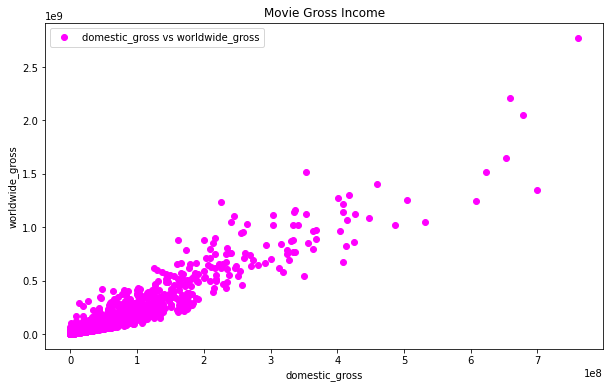

In [27]:
# Create a plot showing the corr between the domestic_gross and worldwide_gross
plt.figure(figsize=(10,6))
plt.scatter(data=budget_merged, x='domestic_gross', y='worldwide_gross', color='magenta')

plt.xlabel('domestic_gross')
plt.ylabel('worldwide_gross')
plt.title('Movie Gross Income')
plt.legend(['domestic_gross vs worldwide_gross'])
plt.show();

From the above scatterplot we can see a strong and positive correlation between the domestic and worldwide gross. There's a probability that if a movie does well in the domestic market, it will also do well in the worldwide market. This also shows that there's an importance in also focusing on the local market for the growth of the movie studio.

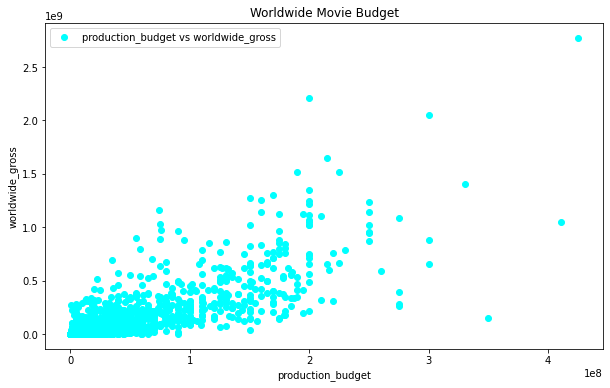

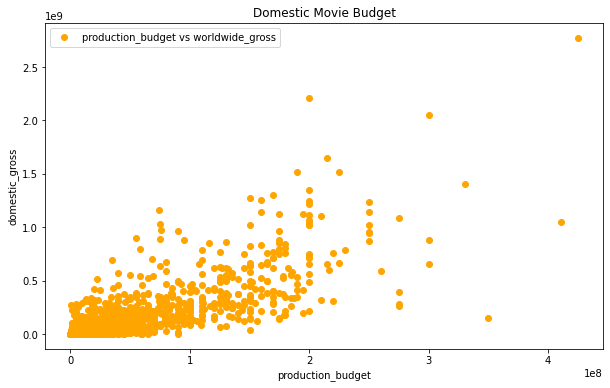

In [28]:
# Create 2 plots showing the corr between the production_budget and worldwide_gross / production_budget and domestic_gross
plt.figure(figsize=(10,6))
plt.scatter(data=budget_merged, x='production_budget', y='worldwide_gross', color='cyan')

plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')
plt.title('Worldwide Movie Budget')
plt.legend(['production_budget vs worldwide_gross'])
plt.show();

plt.figure(figsize=(10,6))
plt.scatter(data=budget_merged, x='production_budget', y='worldwide_gross', color='orange')

plt.xlabel('production_budget')
plt.ylabel('domestic_gross')
plt.title('Domestic Movie Budget')
plt.legend(['production_budget vs worldwide_gross'])
plt.show();

From the above scatterplot we can see a strong and positive correlation between the production_budget and worldwide gross, with some outliers noted. There's a probability that if some movies will do well with a bigger budget, and this might be attributed to a couple of reasons, ie. most of the budget could have been used in the marketing of the movies especially in the worldwide market, Investment in popular movie directors and actors which comes at a higher cost, some movie genre might cost higher because of the special effects like horror movies, scifi etc. 

# 


### Correlation between production_budget, worldwide_gross, worldwide_gross and profit

In [29]:
#Show the top 10 profitable movies 
highest_roi = budget_merged.sort_values(by='profit', ascending= False ).head(10)
highest_roi

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,tt1775309,Abatâ,2011,93.00,Horror,6.10,43
29,43,"Dec 19, 1997",Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00,tt2495766,Titanic,2012,90.54,Adventure,6.20,20
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
24,34,"Jun 12, 2015",Jurassic World,215000000.00,652270625.00,1648854864.00,1433854864.00,tt0369610,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
47,67,"Apr 3, 2015",Furious 7,190000000.00,353007020.00,1518722794.00,1328722794.00,tt2820852,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074
19,27,"May 4, 2012",The Avengers,225000000.00,623279547.00,1517935897.00,1292935897.00,tt0848228,The Avengers,2012,143.00,"Action,Adventure,Sci-Fi",8.10,1183655
28,42,"Feb 16, 2018",Black Panther,200000000.00,700059566.00,1348258224.00,1148258224.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148
78,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.00,417719760.00,1305772799.00,1135772799.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125
109,56,"Nov 22, 2013",Frozen,150000000.00,400738009.00,1272469910.00,1122469910.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311
96,35,"Mar 17, 2017",Beauty and the Beast,160000000.00,504014165.00,1259199706.00,1099199706.00,tt2316801,La belle et la bête,2014,112.00,"Drama,Fantasy,Romance",6.40,18100


In [30]:
#the correlation btw vote_average and vote_count is weak positive correlation
budget_corr =highest_roi[['production_budget', 'worldwide_gross', 'worldwide_gross', 'profit']].corr()
budget_corr

,production_budget,worldwide_gross,worldwide_gross,profit
production_budget,1.00,0.88,0.88,0.83
worldwide_gross,0.88,1.00,1.00,1.00
worldwide_gross,0.88,1.00,1.00,1.00
profit,0.83,1.00,1.00,1.00


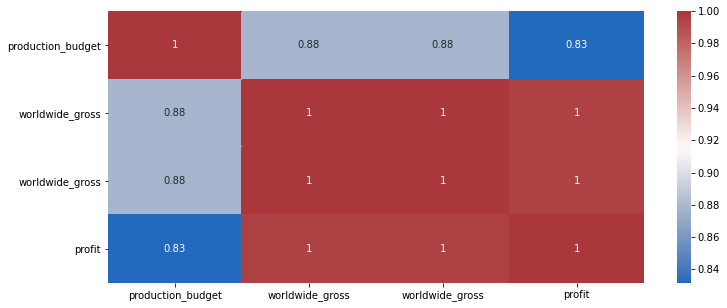

In [31]:
# create a seaborn graph to show the Correlation between production_budget, worldwide_gross, worldwide_gross and profit
plt.figure(figsize = (12,5))
sns.heatmap(budget_corr, cmap ='vlag', annot =True);


# 


### Top 10 movies profitable movies

In [32]:
#Show the top 10 profitable movies 
highest_roi = budget_merged.sort_values(by='profit', ascending= False ).head(10)
highest_roi

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,tt1775309,Abatâ,2011,93.00,Horror,6.10,43
29,43,"Dec 19, 1997",Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00,tt2495766,Titanic,2012,90.54,Adventure,6.20,20
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
24,34,"Jun 12, 2015",Jurassic World,215000000.00,652270625.00,1648854864.00,1433854864.00,tt0369610,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
47,67,"Apr 3, 2015",Furious 7,190000000.00,353007020.00,1518722794.00,1328722794.00,tt2820852,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074
19,27,"May 4, 2012",The Avengers,225000000.00,623279547.00,1517935897.00,1292935897.00,tt0848228,The Avengers,2012,143.00,"Action,Adventure,Sci-Fi",8.10,1183655
28,42,"Feb 16, 2018",Black Panther,200000000.00,700059566.00,1348258224.00,1148258224.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148
78,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.00,417719760.00,1305772799.00,1135772799.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125
109,56,"Nov 22, 2013",Frozen,150000000.00,400738009.00,1272469910.00,1122469910.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311
96,35,"Mar 17, 2017",Beauty and the Beast,160000000.00,504014165.00,1259199706.00,1099199706.00,tt2316801,La belle et la bête,2014,112.00,"Drama,Fantasy,Romance",6.40,18100


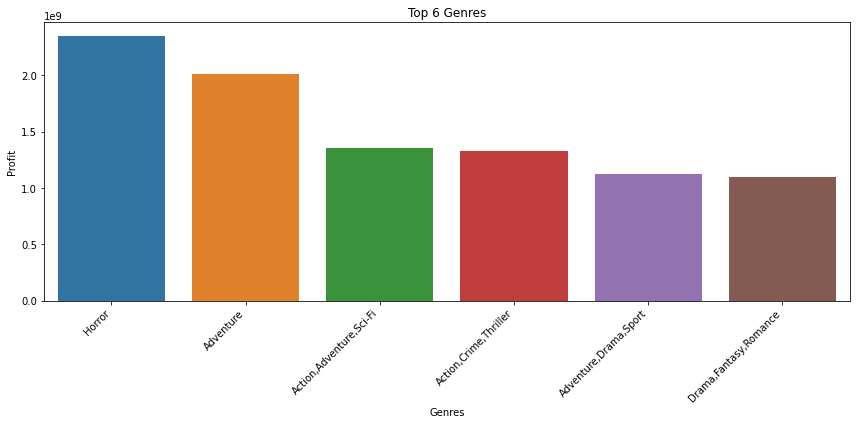

In [43]:
# Plot a barplot showing the top 6 genres making the most profits
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'profit', data = highest_roi, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Top 6 Genres')
plt.tight_layout()
plt.show()

From the bar plot above we can see that Horror movies make the most profits followed by adventure movies. We can also see that there are certain movies that fall under more than one category and are making profits, especially if it also falls under action and drama movies.

# 


## 2. Top Genres

In [34]:
# Get the top 10 with the most value counts
unique_genres = budget_merged['genres'].value_counts().reset_index()
unique_genres.columns = ['genres', 'genres_count']
top_10_genres = unique_genres.head(10)
top_10_genres

,genres,genres_count
0,Drama,141
1,Comedy,76
2,"Comedy,Drama",70
3,"Adventure,Animation,Comedy",68
4,"Comedy,Drama,Romance",64
5,Documentary,61
6,"Action,Adventure,Sci-Fi",55
7,"Drama,Romance",54
8,"Action,Crime,Drama",46
9,"Comedy,Romance",45


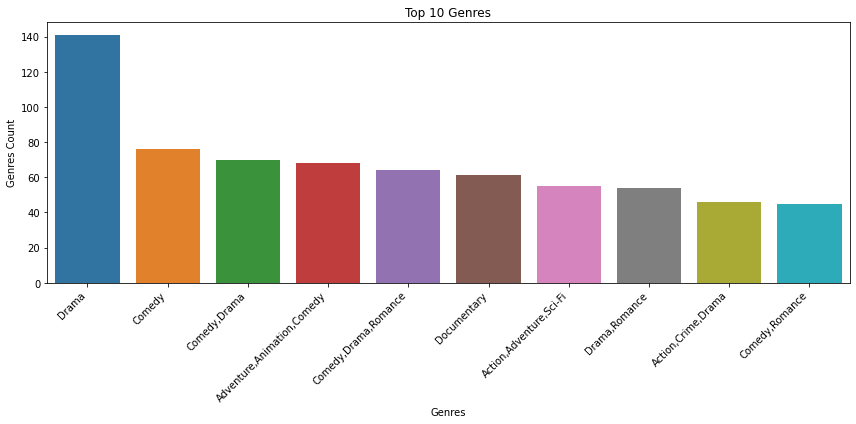

In [35]:
# Plot a bar showing the top 10 genres with the most value counts

plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'genres_count', data = top_10_genres, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Genres Count')
plt.title('Top 10 Genres')
plt.tight_layout()
plt.show()

From the above bar plot we can see that the most popular genre in terms of the number of times movies have been created in that genre, is Drama followed by comedy. From the previous analysis we saw that horrors and adventues make the most profits but drama and comedy are created the most. This might be attributed to a number of things, eg. online streaming shows might be airing these kind of movies because of the demand, The cost of making drama and comedy shows might be lower hense easier to produce more.

### Find the correlation between the average rating and the number of votes

In [36]:
#the correlation btw vote_average and vote_count is weak positive correlation
rating_corr =highest_roi[['averagerating', 'numvotes']].corr()
rating_corr

,averagerating,numvotes
averagerating,1.00,0.87
numvotes,0.87,1.00


<AxesSubplot:>

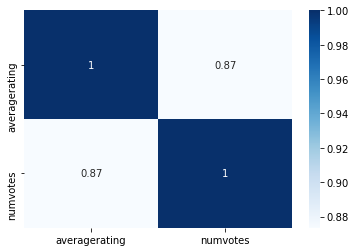

In [37]:
# create a heatmap to show the correlation of the average rating and the number of vote
sns.heatmap(rating_corr, cmap ='Blues', annot =True)

From the heatmap above we can see that there is a good correlation between the average rating and the number of votes. We can predict that the higher the rating the higher the number of votes for the different movies.

### Runtime minutes for the top 10 movies

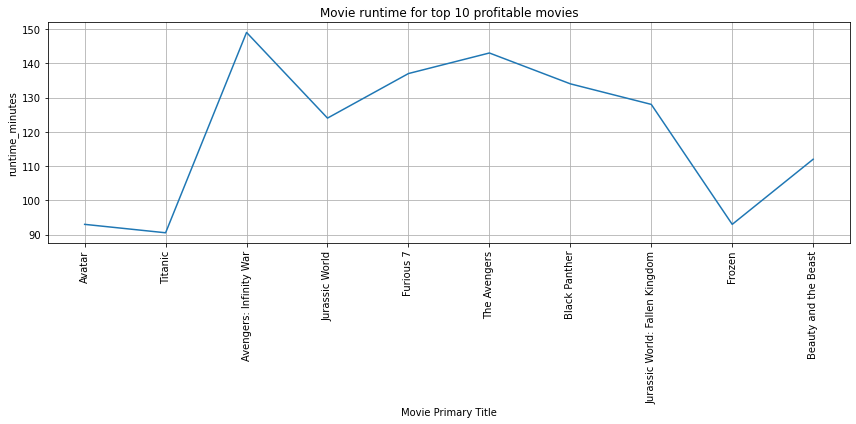

In [38]:
# Plot a lineplot showing Movie runtime for the top 10 profitable movies
plt.figure(figsize=(12, 6))
sns.lineplot(data=highest_roi, x="primary_title", y= "runtime_minutes")
plt.xlabel("Movie Primary Title")
plt.ylabel("runtime_minutes")
plt.title("Movie runtime for top 10 profitable movies")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

From the line plot above we can see that the most profitale movie ran for less than 95 minutes, the longest movie was Avengers which ran for almost 150 minutes, while the shortest, Titanic, ran for around 90 minutes. So we can conclude that averagely, a movie should last between 90 to 150 minutes 

## Return on Investment (ROI) for short films

In [39]:
# Filter short films with a runtime of less than 60 minutes
short_films = budget_merged[budget_merged['runtime_minutes'] < 60]

# Sort the filtered short films by runtime in ascending order
short_films = short_films.sort_values(by='runtime_minutes', ascending=True)
short_films

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
275,31,"Feb 14, 2008",Jumper,82500000.00,80172128.00,222640812.00,140140812.00,tt2923554,Jumper,2013,5.00,"Biography,Documentary,Drama",8.00,5
1520,31,"May 28, 2010",Sea Rex 3D: Journey to a Prehistoric World,5000000.00,6096582.00,16515203.00,11515203.00,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,2010,41.00,Documentary,6.90,364
763,88,"Aug 31, 2018",Kin,30000000.00,5718096.00,10096821.00,-19903179.00,tt2233624,Kin,2012,45.00,"Drama,Music",8.60,46
524,34,"Nov 19, 1980",Heaven's Gate,44000000.00,3484331.00,3484523.00,-40515477.00,tt3570720,Heaven's Gate,2013,47.00,Documentary,6.80,5
590,36,"Sep 24, 2004",The Last Shot,40000000.00,463730.00,463730.00,-39536270.00,tt1754651,The Last Shot,2010,47.00,Action,8.00,9
1798,23,"Oct 3, 2014",La chambre bleue,1400000.00,260441.00,1945420.00,545420.00,tt4586720,La chambre bleue,2015,48.00,Documentary,6.20,6
1628,53,"Jun 12, 1968",Rosemary's Baby,3200000.00,33395426.00,33395426.00,30195426.00,tt4876464,Rosemary's Baby,2015,48.00,Comedy,7.70,14
146,36,"Jun 29, 2005",War of the Worlds,132000000.00,234280354.00,606836535.00,474836535.00,tt3327426,War of the Worlds,2013,50.00,Sci-Fi,5.80,11
749,47,"Aug 25, 2017",Ballerina,30000000.00,21858070.00,96892829.00,66892829.00,tt2560702,Ballerina,2012,50.00,"Biography,Documentary",7.50,13
1089,9,"Jan 18, 2013",Mama,15000000.00,71628180.00,148095566.00,133095566.00,tt1805319,Mama,2010,50.00,Drama,4.50,6


In [40]:
# Calculate ROI and add it as a new column
short_films['ROI'] = (short_films['profit'] / short_films['production_budget']) * 100

# Filter short films with an ROI greater than 20%
short_films_filtered = short_films[short_films['ROI'] > 20]

# Sort the filtered short films by ROI in descending order
short_films_sorted = short_films_filtered.sort_values(by='ROI', ascending=False)

short_films_sorted


,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ROI
1884,47,"Aug 13, 1942",Bambi,858000.00,102797000.00,268000000.00,267142000.00,tt2668120,Bambi,2013,58.00,"Biography,Documentary",7.00,101,31135.43
1628,53,"Jun 12, 1968",Rosemary's Baby,3200000.00,33395426.00,33395426.00,30195426.00,tt4876464,Rosemary's Baby,2015,48.00,Comedy,7.70,14,943.61
1089,9,"Jan 18, 2013",Mama,15000000.00,71628180.00,148095566.00,133095566.00,tt1805319,Mama,2010,50.00,Drama,4.50,6,887.30
1196,54,"Aug 11, 2006",Step Up,12000000.00,65328121.00,110989157.00,98989157.00,tt2516968,Step Up,2012,55.00,"Biography,Documentary,Drama",7.70,59,824.91
146,36,"Jun 29, 2005",War of the Worlds,132000000.00,234280354.00,606836535.00,474836535.00,tt3327426,War of the Worlds,2013,50.00,Sci-Fi,5.80,11,359.72
1032,3,"Sep 25, 2009",Fame,18000000.00,22455510.00,80227619.00,62227619.00,tt5861350,Fame,2017,58.00,Documentary,8.60,7,345.71
1520,31,"May 28, 2010",Sea Rex 3D: Journey to a Prehistoric World,5000000.00,6096582.00,16515203.00,11515203.00,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,2010,41.00,Documentary,6.90,364,230.30
749,47,"Aug 25, 2017",Ballerina,30000000.00,21858070.00,96892829.00,66892829.00,tt2560702,Ballerina,2012,50.00,"Biography,Documentary",7.50,13,222.98
275,31,"Feb 14, 2008",Jumper,82500000.00,80172128.00,222640812.00,140140812.00,tt2923554,Jumper,2013,5.00,"Biography,Documentary,Drama",8.00,5,169.87
831,22,"Sep 21, 2007",Good Luck Chuck,25000000.00,35017297.00,59183821.00,34183821.00,tt5138210,Good Luck Chuck,2016,51.00,Comedy,7.40,8,136.74


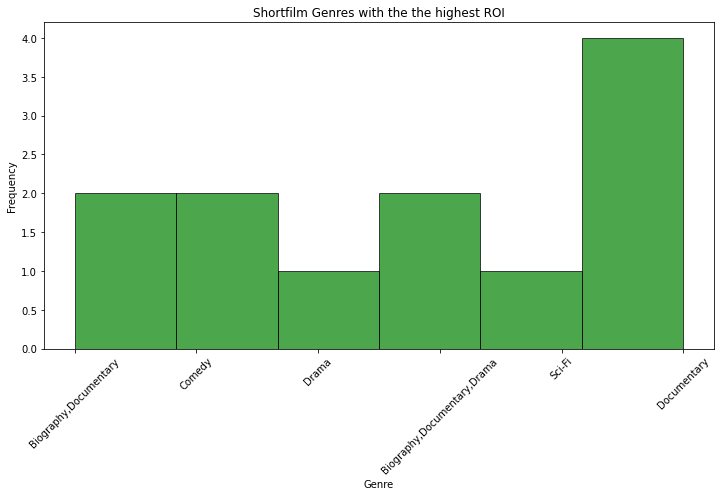

In [41]:
# Plot a histogram showing the frequency of the Shortfilm Genres with the highest ROI
plt.figure(figsize = (12, 6))
plt.hist(short_films_sorted['genres'], bins=6, color='green',alpha=0.7,edgecolor='black', align='mid',)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Shortfilm Genres with the the highest ROI')
plt.show()

From the histogram above, we can conclude that in short films, Documentaries are the most preferred short films.

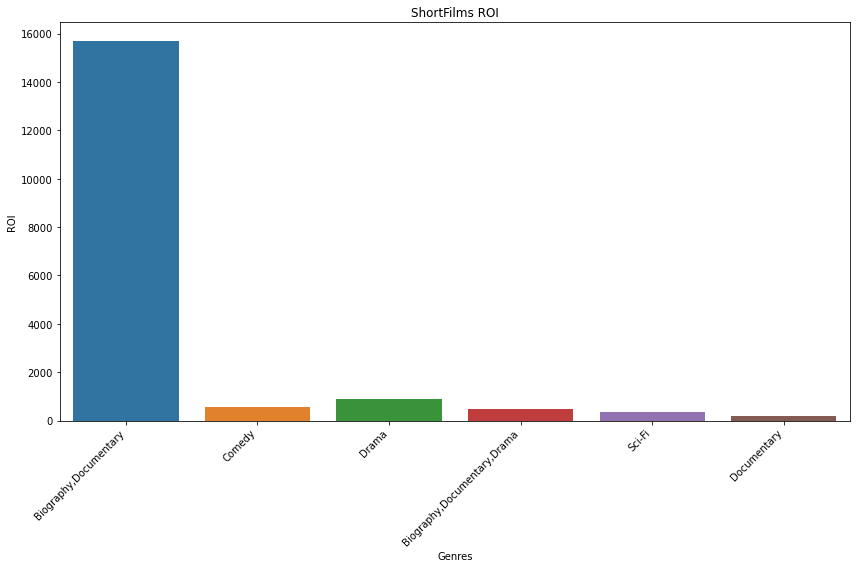

In [42]:
# Plot a bar showing the ShortFilm genres with ROI greater than 20%

plt.figure(figsize = (12, 8))
sns.barplot(x = 'genres', y = 'ROI', data = short_films_sorted, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('ROI')
plt.title('ShortFilms ROI')
plt.tight_layout()
plt.show()

From the barplot above, we can clearly see that Short films in Documentary and Biography have the highest rate of ROI.

# Conclusion

Below are the findings from the analysis conducted above:
- The budget allocated for the production of the film will play a huge role in the profitability of the film alongside other factors like the cast, producers, marketing, language of the film etc. Also note that it's not guaranteed that the budget allocated will automatically result in the success of the film. 
- Popularity of a film doesn't guarantee the profitabilty of the film. From our analysis, there are some genres that were very popular in terms of votecounts but the profitabilty was lightly lower.
- Films that fall under more than one category are popular and profitable too.
- There's a good ROI in shortfilms specifically Documentaries and Biographies.


# Recommendation

- Consider having a good budget for the film production, since we have observed there's a possitive correlation between the budget and the income. But it should be noted that there needs to have a very good marketng strategy for the film, while factoring in the producers and cast to work with.
- Short Documentary films have a high ROI, therefore it is a good genre to focus on too. Diversifying the genres and the kind of films they create is very important as they'll appeal to a wider scope of viewers.
- There are certain external factors that affect the succes of a film, therefore understanding the market and the current social-demographic issues such as - 'Black lives matter', 'Gender Inclusion', 'race' etc.- is very important. It would be good to help push the agenders the company resonates with so as to appeal to it's target market.
- The runtime minutes for films is averagely between 90 - 150 minutes, therefore if there's a probability of having a longer film, it's best to create a limited series.
